# EDA

In [1]:
%matplotlib inline


# Essential libraries
import os
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime, timedelta
from pathlib import Path

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import seaborn as sns

# SQL Component
from urllib.request import urlretrieve
import sqlite3

# Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


## SciKit Learning Preprocessing  
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## SciKit Learn ML Models
from sklearn.linear_model import Lasso


## Data Download

In [2]:
data_path = Path('./src/data')
if not os.path.exists(data_path):
    os.makedirs(data_path)
    print(f'Data folder not exists. Create folder')


url = 'https://techassessment.blob.core.windows.net/aiap-pys-2/noshow.db'

file_path = Path('./src/data/noshow.db')

if file_path.exists():
    print('File already exist, skip download.')
else:
    try:
        print('Downloading Data File')
        urlretrieve(url, file_path)
        print('Download completed')
    except:
        print("Error downloading file. Please check if the file exist at the location:", url)
        print("Please also check if Internet connection is present.")



File already exist, skip download.


## Import Data to DataFrame

In [3]:
list_all_tables = "SELECT name FROM sqlite_master WHERE type='table';"

conn = sqlite3.connect(file_path)
cur = conn.cursor()
cur.execute(list_all_tables)
tables_all = cur.fetchall()[0]
tables_all = list(tables_all)
print(tables_all)
conn.close()

['noshow']


In [4]:
read_table = 'SELECT * FROM ' + tables_all[0]
print(read_table)

SELECT * FROM noshow


In [5]:
conn = sqlite3.connect('./src/data/noshow.db')
df = pd.read_sql(read_table, conn)
conn.close()

## Display Dataframe and Basic Information

In [6]:
df

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119386,4823,0.0,Changi,September,April,3.0,April,5.0,China,Yes,King,USD$ 612.18,Website,1,1.0
119387,25062,0.0,Orchard,March,December,30.0,January,3.0,China,Yes,King,USD$ 1041.29,Email,2,0.0
119388,81936,1.0,Changi,September,March,31.0,April,1.0,Indonesia,Yes,King,USD$ 641.47,Email,1,2.0
119389,6738,0.0,Changi,February,February,25.0,February,27.0,China,Yes,None,SGD$ 886.35,Website,2,0.0


In [7]:
m = len(df)
print(f"There are a total of {m} records.")

There are a total of 119391 records.


#### Display Basic Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB


In [9]:
df.info

<bound method DataFrame.info of         booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0            94113      0.0   Changi      November          June         25.0   
1            86543      0.0  Orchard        August      November         28.0   
2            75928      0.0   Changi         March      February          7.0   
3            66947      1.0  Orchard     September       October          1.0   
4           106390      0.0  Orchard         March          June         20.0   
...            ...      ...      ...           ...           ...          ...   
119386        4823      0.0   Changi     September         April          3.0   
119387       25062      0.0  Orchard         March      December         30.0   
119388       81936      1.0   Changi     September         March         31.0   
119389        6738      0.0   Changi      February      February         25.0   
119390       99643      0.0   Changi         March          July         18.0

<font color='blue'>
    
**Identified column `no_show` as target. Assume 1 as customer did not show up. Need to confirm with the management.**
    
**Identified column `price` that needs further processing. We need to extract the currency and convert all prices to same local currency.**

In [10]:
df.branch.unique()

array(['Changi', 'Orchard', None], dtype=object)

In [11]:
df.num_adults.unique()

array(['1', '2', 'one', 'two', None], dtype=object)

<font color='blue'>
    
**Identified column `num_adults` is in string. Need to convert to integer. Also need to check for `None` value.**

In [12]:
df.describe()

,booking_id,no_show,arrival_day,checkout_day,num_children
count,119391.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59695.000000,0.370416,15.798241,14.250507,0.871229
std,34465.357332,0.482918,8.780829,11.063697,0.779796
min,0.000000,0.000000,1.000000,-31.000000,0.000000
25%,29847.500000,0.000000,8.000000,7.000000,0.000000
50%,59695.000000,0.000000,16.000000,15.000000,1.000000
75%,89542.500000,1.000000,23.000000,23.000000,1.000000
max,119390.000000,1.000000,31.000000,31.000000,3.000000


In [13]:
df.isnull().sum()

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

<font color='blue'>

**We need to address the null values for the column `room` and the column `price` which part of the features. We also need to check for record which has multiple null.**

#### Checking `booking_id`

**There is a column known as `student_id` which potentially can be used as index.**

In [14]:
len(df['booking_id'].unique())

119391

<font color = 'blue'>

**The booking_id is unique. This can be used as index.**

#### Checking for record with multiple null entries

In [15]:
df[df['no_show'].isnull()]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
111598,115536,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


<font color='blue'>

**This record can be deleted.**

#### Checking Categorical Columns

In [16]:
df.info

<bound method DataFrame.info of         booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0            94113      0.0   Changi      November          June         25.0   
1            86543      0.0  Orchard        August      November         28.0   
2            75928      0.0   Changi         March      February          7.0   
3            66947      1.0  Orchard     September       October          1.0   
4           106390      0.0  Orchard         March          June         20.0   
...            ...      ...      ...           ...           ...          ...   
119386        4823      0.0   Changi     September         April          3.0   
119387       25062      0.0  Orchard         March      December         30.0   
119388       81936      1.0   Changi     September         March         31.0   
119389        6738      0.0   Changi      February      February         25.0   
119390       99643      0.0   Changi         March          July         18.0

<font color='blue'>
    
**Identified categorical features are `branch`, `country`, `room`, `first_time` and `platform`.**

**As hotel occupancy is seasonal, we identified columns `arrival_month` and `arrival_day` that can be engineered to a single columns for a specific day-month category. Same can be applied to `checkout_month` and `checkout_day`. `booking_month` can also be engineered into `mths_booking` to record number of months in advance booking before the arrival month.**

In [17]:
df['arrival_month'].unique()

array(['June', 'November', 'February', 'October', 'September', 'March',
       'May', 'August', 'July', 'January', 'April', 'December', 'ApRiL',
       'OcTobeR', 'JuNe', 'JulY', 'ApriL', 'OctOber', 'DecembEr',
       'SeptEmber', 'JanUary', 'JUne', 'FeBruary', 'JanuarY', 'DEcember',
       'SePtember', 'DecembeR', 'MaY', 'NoVember', 'JUly', 'JunE', 'JuLy',
       'FebrUary', 'NOvember', 'SeptemBer', 'OctobeR', 'DecemBer',
       'MarCh', 'AuguSt', 'AugusT', 'APril', 'SepTember', 'NovembEr',
       'FEbruary', 'DeceMber', 'AuGust', 'SepteMber', 'FebruaRy',
       'OctoBer', 'JanuaRy', 'MarcH', 'ApRil', 'AUgust', 'JanuAry',
       'NOveMber', 'MaRch', 'AprIl', 'MAy', 'NovemBer', 'DecEmber',
       'MArch', 'JaNuary', 'NovembeR', 'SeptembEr', 'FebruarY',
       'SeptembeR', 'OcTober', 'DeCember', 'FebruAry', 'AugUst',
       'NovEmber', 'NoveMber', 'OctobEr', 'OCtober', 'SEptember',
       'JAnuary', 'SeptEMber', 'MAY', 'FebRuary', 'FeBruarY', 'OCTober',
       'JUnE', 'DecEMber', 'Febru

In [18]:
df['arrival_day'].unique()

array([25., 28.,  7.,  1., 20., 12., 15., 18., 27., 22.,  9., 11., 10.,
       13., 30., 21.,  5.,  6.,  2., 31., 19.,  4.,  3., 23., 17.,  8.,
       26., 14., 24., 29., 16., nan])

In [19]:
df['checkout_month'].unique()

array(['June', 'November', 'February', 'October', 'September', 'March',
       'May', 'August', 'July', 'January', 'April', 'December', None],
      dtype=object)

In [20]:
df['checkout_day'].unique()

array([ 27.,  29.,  11.,   3.,  24.,  13.,  16.,  19.,  28.,  10.,  12.,
        15.,  23.,  31.,  25.,  17.,   8.,   2.,   9.,   7.,   1.,  20.,
        14.,  -4.,   4.,   6.,  21.,   5.,  18.,  22., -10.,  -3.,  30.,
        26.,  -6.,  -5., -28., -20., -16., -19., -17., -12., -30., -26.,
        -8., -24., -15., -21.,  -1.,  -7., -27., -11., -18., -22., -13.,
       -14., -29., -23.,  -9.,  -2., -31., -25.,  nan])

<font color='blue'>
    
**For `arrival_month`, we need to fixed the uppercase and lowercase issue. For `checkout_day`, we need to fixed the negatives**

In [21]:
df.head()

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0


### Basic Analysis Summary

Base on the information above, we need to consider the following:

- The target `y_train` should be the `no_show` column. Need to confirm with management that customer who did not show up is 1.
- The column `booking_id` can be use as index.
- We need to remove one null record with `booking_id = 115536`.
- We need to change `num_adults` to integer and check for null values.
- Also change `no_show` and `num_children` to integer.
- We need to process the column `price` by extracting the currency and convert the price to local currency.
- We need to fill up the null values for `room` and `price`.
- For room type we use the most frequent room in the existing data.
- As price is seasonal, we will use the average price of same day and room type to fill the null value. If there is no price, then we use the average price of the room type.
- We need to combine columns `arrival_month` and `arrival_day` to a new column `arrival_date` and set as a categorical column. We also need to fixed the uppercase and lowercase issue in `arrival_month`.
- We need to combine columns `checkout_month` and `checkout_day` to a new column `checkout_date` and set as a categorical column. For `checkout_day`, we also need to fixed the negative number.
- We can also add a new column to compute the number of days stayed column name is `days_stayed`.
- We also need to convert the `booking_month` to a numerical column known as `mths_booking`. This is to track the advancing booking in months before the arrival month.  
- Categorical features such as `branch`, `country`, `room` and `platform`, should be converted into one-hot encoding for machine learning. We can serialized the date. For EDA analysis, we will be using class index encoder.
- We will use correlational analysis to check for close correlation.
- We also need to check for imbalance data size.

### Plan of Action

We also plan for the following actions:
1. We need to set the index using `booking_id`.
2. We need to remove one record with null values in `booking_id = 115536`.
3. Change `num_adults` to integer and investigate the null values.
4. Change `no_show` and `num_children` to integer.
5. Extract the currency from `price` column.
6. Convert the `price` of other currency to local currency and set the new column `local_price` as float.
7. Fixed the `arrival_month` and `checkout_day` issue.
8. Combine columns `arrival_month` and `arrival_day` to a new column as `arrival_date` and set as a categorical column.
9. Combine columns `checkout_month` and `checkout_day` to a new column as `checkout_date` and set as a categorical column.
10. Compute a new column `days_stayed` by taking the difference between `arrival_date` and `checkout_date`.
11. Compute a new column `mths_booking` to track how advance the booking is done before arrival.
12. Perform data splitting to train and test data.
13. Find out the most frequent room type and fill the null value of column `room` with the most frequent room type.
14. For null values on column `price`, we will use same day, same room type as the price reference. If no reference available, then we use average price of same room type.
15. For EDA we convert all categorical data into class index for analysis. For machine learning, we will perform one-hot encoding for `branch`, `country`, `room`, `first_time` and `platform`. We will use class index for the dates and month.
16. Use correlational analysis to check which features has the least correlation.
17. Check if `y` label is imbalance.

### Important Assumption

- In the target label `no_show`, `1` is customer did not show up.
- From the analysis below, there is 29 February. There is no year in the data so we assume that the year is either 2016 or 2020. Considering 2020 is pandemic year, there is a possibility that the year could be 2016.\
- Currency conversion rate of 1 USD is 1.35.

In [22]:
year = '2016'
SGD_one_USD = 1.35 

## Data Cleaning Before Data Split

In [23]:
df.head()

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0


### Setting Index

In [24]:
df.pivot_table(index=['booking_id'], aggfunc='size')

booking_id
0         1
1         1
2         1
3         1
4         1
         ..
119386    1
119387    1
119388    1
119389    1
119390    1
Length: 119391, dtype: int64

<font color='red'>

**`booking_id` is unique. Use `booking_id` as index.**

In [25]:
df.set_index('booking_id', inplace=True)

In [26]:
df

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
booking_id,,,,,,,,,,,,,,
94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,0.0,Changi,September,April,3.0,April,5.0,China,Yes,King,USD$ 612.18,Website,1,1.0
25062,0.0,Orchard,March,December,30.0,January,3.0,China,Yes,King,USD$ 1041.29,Email,2,0.0
81936,1.0,Changi,September,March,31.0,April,1.0,Indonesia,Yes,King,USD$ 641.47,Email,1,2.0


In [27]:
m = len(df)
print(f"There are a total of {m} records.")

There are a total of 119391 records.


### Checking and Removing Null Record

In [28]:
df[df['no_show'].isnull()]

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
booking_id,,,,,,,,,,,,,,
115536,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


<font color='red'>

**Delete record with index 115536.**

In [29]:
df = df.drop(index = 115536)

In [30]:
m = len(df)
print(f"There are a total of {m} records.")

There are a total of 119390 records.


In [31]:
df.isnull().sum()

no_show               0
branch                0
booking_month         0
arrival_month         0
arrival_day           0
checkout_month        0
checkout_day          0
country               0
first_time            0
room              21612
price             24881
platform              0
num_adults            0
num_children          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 94113 to 99643
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   no_show         119390 non-null  float64
 1   branch          119390 non-null  object 
 2   booking_month   119390 non-null  object 
 3   arrival_month   119390 non-null  object 
 4   arrival_day     119390 non-null  float64
 5   checkout_month  119390 non-null  object 
 6   checkout_day    119390 non-null  float64
 7   country         119390 non-null  object 
 8   first_time      119390 non-null  object 
 9   room            97778 non-null   object 
 10  price           94509 non-null   object 
 11  platform        119390 non-null  object 
 12  num_adults      119390 non-null  object 
 13  num_children    119390 non-null  float64
dtypes: float64(4), object(10)
memory usage: 13.7+ MB


### Convert Column `num_adults`

In [33]:
df.num_adults.unique()

array(['1', '2', 'one', 'two'], dtype=object)

<font color='red'>

**Replace string `one` with `1` and `two` with `2`, before converting all strings to integer.**

In [34]:
df.num_adults = df.num_adults.replace('one', '1')
df.num_adults = df.num_adults.replace('two', '2')

In [35]:
df.num_adults.unique()

array(['1', '2'], dtype=object)

<font color='red'>

**Convert column to integer.**

In [36]:
df.num_adults = df.num_adults.astype(int)

In [37]:
df.num_adults.unique()

array([1, 2])

### Change `no_show` and `num_children` to Integer.

<font color='red'>

**Convert column to integer.**

In [38]:
df.num_children = df.num_children.astype(int)
df.no_show = df.no_show.astype(int)

In [39]:
df.num_children.unique()

array([0, 2, 1, 3])

In [40]:
df.no_show.unique()

array([0, 1])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 94113 to 99643
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   no_show         119390 non-null  int64  
 1   branch          119390 non-null  object 
 2   booking_month   119390 non-null  object 
 3   arrival_month   119390 non-null  object 
 4   arrival_day     119390 non-null  float64
 5   checkout_month  119390 non-null  object 
 6   checkout_day    119390 non-null  float64
 7   country         119390 non-null  object 
 8   first_time      119390 non-null  object 
 9   room            97778 non-null   object 
 10  price           94509 non-null   object 
 11  platform        119390 non-null  object 
 12  num_adults      119390 non-null  int64  
 13  num_children    119390 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 13.7+ MB


### Price Conversion

In [42]:
pdf = df['price'].str.split(' ', expand = True)

In [43]:
pdf.columns = ['CUR', 'price']

In [44]:
pdf['CUR'].unique()

array(['SGD$', None, 'USD$'], dtype=object)

In [45]:
pdf.head()

,CUR,price
booking_id,,
94113,SGD$,492.98
86543,SGD$,1351.22
75928,None,None
66947,SGD$,666.04
106390,USD$,665.37


In [46]:
pdf.price

booking_id
94113      492.98
86543     1351.22
75928        None
66947      666.04
106390     665.37
           ...   
4823       612.18
25062     1041.29
81936      641.47
6738       886.35
99643      901.95
Name: price, Length: 119390, dtype: object

<font color='red'>

**Price is still in string, need to convert to floating point numbers.**

In [47]:
pdf.price = pdf.price.astype(float)

In [48]:
pdf.head()

,CUR,price
booking_id,,
94113,SGD$,492.98
86543,SGD$,1351.22
75928,None,NaN
66947,SGD$,666.04
106390,USD$,665.37


<font color='red'>

**Convert price in USD to SGD. Assumption 1 USD = 1.35 SGD**

In [49]:
pdf['local_price'] = np.where(pdf.CUR == 'USD$',pdf.price * SGD_one_USD, pdf.price)

In [50]:
pdf

,CUR,price,local_price
booking_id,,,
94113,SGD$,492.98,492.9800
86543,SGD$,1351.22,1351.2200
75928,None,NaN,NaN
66947,SGD$,666.04,666.0400
106390,USD$,665.37,898.2495
...,...,...,...
4823,USD$,612.18,826.4430
25062,USD$,1041.29,1405.7415
81936,USD$,641.47,865.9845


In [51]:
pdf = pdf['local_price']

<font color='red'>

**Merging price column to the main dataset and drop the old column.**

In [52]:
df2 = pd.merge(df, pdf, left_index=True, right_index=True)

In [53]:
df2.head()

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children,local_price
booking_id,,,,,,,,,,,,,,,
94113,0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0,492.9800
86543,0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0,1351.2200
75928,0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0,NaN
66947,1,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0,666.0400
106390,0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0,898.2495


In [54]:
df2.drop(columns=['price'], inplace=True)

In [55]:
df2.head()

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,platform,num_adults,num_children,local_price
booking_id,,,,,,,,,,,,,,
94113,0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,Website,1,0,492.9800
86543,0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,Website,2,0,1351.2200
75928,0,Changi,March,February,7.0,February,11.0,India,Yes,Single,Agent,1,0,NaN
66947,1,Orchard,September,October,1.0,October,3.0,China,Yes,Single,Website,1,0,666.0400
106390,0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,Website,1,0,898.2495


### Feature Engineering : Arrival Date and Check Out Date

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 94113 to 99643
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   no_show         119390 non-null  int64  
 1   branch          119390 non-null  object 
 2   booking_month   119390 non-null  object 
 3   arrival_month   119390 non-null  object 
 4   arrival_day     119390 non-null  float64
 5   checkout_month  119390 non-null  object 
 6   checkout_day    119390 non-null  float64
 7   country         119390 non-null  object 
 8   first_time      119390 non-null  object 
 9   room            97778 non-null   object 
 10  platform        119390 non-null  object 
 11  num_adults      119390 non-null  int64  
 12  num_children    119390 non-null  int64  
 13  local_price     94509 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 17.7+ MB


**Day is on float and month is in string object.**

In [57]:
df2.head()

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,platform,num_adults,num_children,local_price
booking_id,,,,,,,,,,,,,,
94113,0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,Website,1,0,492.9800
86543,0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,Website,2,0,1351.2200
75928,0,Changi,March,February,7.0,February,11.0,India,Yes,Single,Agent,1,0,NaN
66947,1,Orchard,September,October,1.0,October,3.0,China,Yes,Single,Website,1,0,666.0400
106390,0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,Website,1,0,898.2495


In [58]:
df2['arrival_month'].unique()

array(['June', 'November', 'February', 'October', 'September', 'March',
       'May', 'August', 'July', 'January', 'April', 'December', 'ApRiL',
       'OcTobeR', 'JuNe', 'JulY', 'ApriL', 'OctOber', 'DecembEr',
       'SeptEmber', 'JanUary', 'JUne', 'FeBruary', 'JanuarY', 'DEcember',
       'SePtember', 'DecembeR', 'MaY', 'NoVember', 'JUly', 'JunE', 'JuLy',
       'FebrUary', 'NOvember', 'SeptemBer', 'OctobeR', 'DecemBer',
       'MarCh', 'AuguSt', 'AugusT', 'APril', 'SepTember', 'NovembEr',
       'FEbruary', 'DeceMber', 'AuGust', 'SepteMber', 'FebruaRy',
       'OctoBer', 'JanuaRy', 'MarcH', 'ApRil', 'AUgust', 'JanuAry',
       'NOveMber', 'MaRch', 'AprIl', 'MAy', 'NovemBer', 'DecEmber',
       'MArch', 'JaNuary', 'NovembeR', 'SeptembEr', 'FebruarY',
       'SeptembeR', 'OcTober', 'DeCember', 'FebruAry', 'AugUst',
       'NovEmber', 'NoveMber', 'OctobEr', 'OCtober', 'SEptember',
       'JAnuary', 'SeptEMber', 'MAY', 'FebRuary', 'FeBruarY', 'OCTober',
       'JUnE', 'DecEMber', 'Febru

<font color='red'>

**Convert all the string case to capitalized for `arrival_month`.**

In [59]:
df2['arrival_month'] = df2['arrival_month'].str.capitalize()

In [60]:
df2['arrival_month'].unique()

array(['June', 'November', 'February', 'October', 'September', 'March',
       'May', 'August', 'July', 'January', 'April', 'December'],
      dtype=object)

In [61]:
len(df2['arrival_month'].unique())

12

In [62]:
df2['checkout_month'].unique()

array(['June', 'November', 'February', 'October', 'September', 'March',
       'May', 'August', 'July', 'January', 'April', 'December'],
      dtype=object)

In [63]:
len(df2['checkout_month'].unique())

12

In [64]:
df2['checkout_day'].unique()

array([ 27.,  29.,  11.,   3.,  24.,  13.,  16.,  19.,  28.,  10.,  12.,
        15.,  23.,  31.,  25.,  17.,   8.,   2.,   9.,   7.,   1.,  20.,
        14.,  -4.,   4.,   6.,  21.,   5.,  18.,  22., -10.,  -3.,  30.,
        26.,  -6.,  -5., -28., -20., -16., -19., -17., -12., -30., -26.,
        -8., -24., -15., -21.,  -1.,  -7., -27., -11., -18., -22., -13.,
       -14., -29., -23.,  -9.,  -2., -31., -25.])

<font color='red'>

**Convert `checkout_day` to absolute value and convert to integer.**

In [65]:
df2['checkout_day'] = abs(df2['checkout_day']).astype(int)

In [66]:
df2['checkout_day'].unique()

array([27, 29, 11,  3, 24, 13, 16, 19, 28, 10, 12, 15, 23, 31, 25, 17,  8,
        2,  9,  7,  1, 20, 14,  4,  6, 21,  5, 18, 22, 30, 26])

In [67]:
len(df2['checkout_day'].unique())

31

<font color='red'>

**Convert `arrival_day` to integer.**

In [68]:
df2['arrival_day'] = df2['arrival_day'].astype(int)

In [69]:
df2['arrival_day'].unique()

array([25, 28,  7,  1, 20, 12, 15, 18, 27, 22,  9, 11, 10, 13, 30, 21,  5,
        6,  2, 31, 19,  4,  3, 23, 17,  8, 26, 14, 24, 29, 16])

In [70]:
len(df2['arrival_day'].unique())

31

<font color='blue'>

**Ready for feature engineering**

In [71]:
adf = df2[['booking_month', 'arrival_month', 'arrival_day', 'checkout_month', 'checkout_day']].copy()

In [72]:
adf.head()

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day
booking_id,,,,,
94113,November,June,25,June,27
86543,August,November,28,November,29
75928,March,February,7,February,11
66947,September,October,1,October,3
106390,March,June,20,June,24


<font color='blue'>

**Checking for day that are wrong in short months.**

In [73]:
short_months = ['April', 'June', 'September', 'November']

In [74]:
for month in short_months:
    print(month)
    print(adf[(adf['arrival_month']==month) & (adf['arrival_day'] == 31)])    

April
Empty DataFrame
Columns: [booking_month, arrival_month, arrival_day, checkout_month, checkout_day]
Index: []
June
Empty DataFrame
Columns: [booking_month, arrival_month, arrival_day, checkout_month, checkout_day]
Index: []
September
Empty DataFrame
Columns: [booking_month, arrival_month, arrival_day, checkout_month, checkout_day]
Index: []
November
Empty DataFrame
Columns: [booking_month, arrival_month, arrival_day, checkout_month, checkout_day]
Index: []


<font color='blue'>
    
**No wrong days. Check for 29 February.**

In [75]:
adf[(adf['arrival_month']=='February') & (adf['arrival_day'] == 29)]

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day
booking_id,,,,,
4663,May,February,29,March,2
80461,May,February,29,March,2
93563,May,February,29,March,2
24163,May,February,29,March,2
95194,December,February,29,March,2
...,...,...,...,...,...
92632,May,February,29,March,2
96768,May,February,29,March,2
22440,May,February,29,March,2


<font color='blue'>
    
**There is 29 in February, so this is a leap year. So we can set the year as a leap year. The year could also be 2016 or 2020. Need to confirm with management. Please set the year as string under Important Assumption section above.**

In [76]:
adf[(adf['checkout_month']=='February') & (adf['checkout_day'] == 29)]

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day
booking_id,,,,,


**For check out day there is no 29 Feb.**

<font color='red'>
    
**Create a new column as year and then combine `arrival_month` and `arrival_day` into datetime format as `start_date` for computation. Do the same for `checkout_month` and `checkout_day` with a new column `end_date`.**

In [77]:
# This variable is set above under the section Important Assumption
year

'2016'

In [78]:
adf['year'] = year

In [79]:
adf['arrival_day'] = adf['arrival_day'].astype(str)
adf['checkout_day'] = adf['checkout_day'].astype(str)

In [80]:
adf.head()

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year
booking_id,,,,,,
94113,November,June,25,June,27,2016
86543,August,November,28,November,29,2016
75928,March,February,7,February,11,2016
66947,September,October,1,October,3,2016
106390,March,June,20,June,24,2016


In [81]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 94113 to 99643
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   booking_month   119390 non-null  object
 1   arrival_month   119390 non-null  object
 2   arrival_day     119390 non-null  object
 3   checkout_month  119390 non-null  object
 4   checkout_day    119390 non-null  object
 5   year            119390 non-null  object
dtypes: object(6)
memory usage: 10.4+ MB


In [82]:
adf['start_date'] = pd.to_datetime(adf['arrival_day']+'-'+adf['arrival_month']+'-'+adf['year'], format='%d-%B-%Y')
adf['end_date'] = pd.to_datetime(adf['checkout_day']+'-'+adf['checkout_month']+'-'+adf['year'], format='%d-%B-%Y')

In [83]:
adf.head()

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date
booking_id,,,,,,,,
94113,November,June,25,June,27,2016,2016-06-25,2016-06-27
86543,August,November,28,November,29,2016,2016-11-28,2016-11-29
75928,March,February,7,February,11,2016,2016-02-07,2016-02-11
66947,September,October,1,October,3,2016,2016-10-01,2016-10-03
106390,March,June,20,June,24,2016,2016-06-20,2016-06-24


<font color='blue'>
    
**We need to consider year end crossing over year to next year. Need to check if start date is larger then end date.**

In [84]:
print(adf[adf['start_date'] > adf['end_date']].to_string())

           booking_month arrival_month arrival_day checkout_month checkout_day  year start_date   end_date
booking_id                                                                                                
69075             August      December          31        January            1  2016 2016-12-31 2016-01-01
33099               June      December          31        January            2  2016 2016-12-31 2016-01-02
89915              April      December          29        January            2  2016 2016-12-29 2016-01-02
55261            January      December          29        January            1  2016 2016-12-29 2016-01-01
29180               July      December          29        January            2  2016 2016-12-29 2016-01-02
52621              March      December          30        January            3  2016 2016-12-30 2016-01-03
55786          September      December          29        January            2  2016 2016-12-29 2016-01-02
17468            January      Decembe

In [85]:
problem_year_list = (adf[adf['start_date'] > adf['end_date']]).index

<font color='red'>
    
**Change the `end_date` to one year later, if the `start_date` is larger than end_date. For example, 30 December is greater than 3 January. So we add 1 year so that it will become 3 January on the next year.**

In [86]:
adf['end_date'] = adf['end_date'].where(adf['start_date'] < adf['end_date'], adf['end_date'] + pd.DateOffset(years=1))

In [87]:
adf.head()

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date
booking_id,,,,,,,,
94113,November,June,25,June,27,2016,2016-06-25,2016-06-27
86543,August,November,28,November,29,2016,2016-11-28,2016-11-29
75928,March,February,7,February,11,2016,2016-02-07,2016-02-11
66947,September,October,1,October,3,2016,2016-10-01,2016-10-03
106390,March,June,20,June,24,2016,2016-06-20,2016-06-24


In [88]:
print(adf[adf['start_date'] > adf['end_date']].to_string())

Empty DataFrame
Columns: [booking_month, arrival_month, arrival_day, checkout_month, checkout_day, year, start_date, end_date]
Index: []


In [89]:
adf.loc[problem_year_list]

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date
booking_id,,,,,,,,
69075,August,December,31,January,1,2016,2016-12-31,2017-01-01
33099,June,December,31,January,2,2016,2016-12-31,2017-01-02
89915,April,December,29,January,2,2016,2016-12-29,2017-01-02
55261,January,December,29,January,1,2016,2016-12-29,2017-01-01
29180,July,December,29,January,2,2016,2016-12-29,2017-01-02
...,...,...,...,...,...,...,...,...
97916,August,December,30,January,1,2016,2016-12-30,2017-01-01
100380,November,December,30,January,3,2016,2016-12-30,2017-01-03
111510,October,December,31,January,2,2016,2016-12-31,2017-01-02


<font color='red'>
    
**Compute a new column `days_stayed` by taking the difference between `start_date` and `end_date`.**

In [90]:
adf['days_stayed'] = (adf['end_date'] - adf['start_date']).dt.days

In [91]:
adf.head()

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date,days_stayed
booking_id,,,,,,,,,
94113,November,June,25,June,27,2016,2016-06-25,2016-06-27,2
86543,August,November,28,November,29,2016,2016-11-28,2016-11-29,1
75928,March,February,7,February,11,2016,2016-02-07,2016-02-11,4
66947,September,October,1,October,3,2016,2016-10-01,2016-10-03,2
106390,March,June,20,June,24,2016,2016-06-20,2016-06-24,4


In [92]:
adf['days_stayed'].unique()

array([ 2,  1,  4, 14,  3,  5,  8, 28, 22, 15, 21, 29, 23, 40, 42, 49, 44,
        9, 35, 54, 62, 64, 43, 30,  6, 46, 16, 57])

In [93]:
adf[adf['days_stayed'] > 30]

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date,days_stayed
booking_id,,,,,,,,,
17942,March,January,26,March,6,2016,2016-01-26,2016-03-06,40
75124,November,January,12,February,23,2016,2016-01-12,2016-02-23,42
66290,November,March,11,April,29,2016,2016-03-11,2016-04-29,49
108787,January,February,3,March,18,2016,2016-02-03,2016-03-18,44
62165,October,January,15,February,19,2016,2016-01-15,2016-02-19,35
25712,March,January,10,March,4,2016,2016-01-10,2016-03-04,54
72708,March,August,1,October,2,2016,2016-08-01,2016-10-02,62
37081,January,July,5,September,7,2016,2016-07-05,2016-09-07,64
5623,October,January,15,February,19,2016,2016-01-15,2016-02-19,35


In [94]:
adf.loc[problem_year_list]

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date,days_stayed
booking_id,,,,,,,,,
69075,August,December,31,January,1,2016,2016-12-31,2017-01-01,1
33099,June,December,31,January,2,2016,2016-12-31,2017-01-02,2
89915,April,December,29,January,2,2016,2016-12-29,2017-01-02,4
55261,January,December,29,January,1,2016,2016-12-29,2017-01-01,3
29180,July,December,29,January,2,2016,2016-12-29,2017-01-02,4
...,...,...,...,...,...,...,...,...,...
97916,August,December,30,January,1,2016,2016-12-30,2017-01-01,2
100380,November,December,30,January,3,2016,2016-12-30,2017-01-03,4
111510,October,December,31,January,2,2016,2016-12-31,2017-01-02,2


<font color='blue'>

**The following extract `start_date` and `end_date` and check if we use string to convert to categorical is better.**

In [95]:
date_test = adf[['start_date', 'end_date']].copy()

In [96]:
date_test['arrival_date1'] = adf['start_date'].dt.strftime('%d-%m-%y').astype("category")

In [97]:
date_test['arrival_date1']

booking_id
94113     25-06-16
86543     28-11-16
75928     07-02-16
66947     01-10-16
106390    20-06-16
            ...   
4823      03-04-16
25062     30-12-16
81936     31-03-16
6738      25-02-16
99643     18-07-16
Name: arrival_date1, Length: 119390, dtype: category
Categories (366, object): ['01-01-16', '01-02-16', '01-03-16', '01-04-16', ..., '31-07-16', '31-08-16', '31-10-16', '31-12-16']

**The category is not in order. Will convert to category directly from datetime.**

In [98]:
date_test['arrival_date2'] = adf['start_date'].astype("category")

In [99]:
date_test['arrival_date2']

booking_id
94113    2016-06-25
86543    2016-11-28
75928    2016-02-07
66947    2016-10-01
106390   2016-06-20
            ...    
4823     2016-04-03
25062    2016-12-30
81936    2016-03-31
6738     2016-02-25
99643    2016-07-18
Name: arrival_date2, Length: 119390, dtype: category
Categories (366, datetime64[ns]): [2016-01-01, 2016-01-02, 2016-01-03, 2016-01-04, ..., 2016-12-28, 2016-12-29, 2016-12-30, 2016-12-31]

In [100]:
date_test['checkout_date1'] = adf['start_date'].dt.strftime('%d-%m-%y').astype("category")

In [101]:
date_test['checkout_date1']

booking_id
94113     25-06-16
86543     28-11-16
75928     07-02-16
66947     01-10-16
106390    20-06-16
            ...   
4823      03-04-16
25062     30-12-16
81936     31-03-16
6738      25-02-16
99643     18-07-16
Name: checkout_date1, Length: 119390, dtype: category
Categories (366, object): ['01-01-16', '01-02-16', '01-03-16', '01-04-16', ..., '31-07-16', '31-08-16', '31-10-16', '31-12-16']

In [102]:
date_test['checkout_date2'] = adf['end_date'].astype("category")

In [103]:
date_test['checkout_date2']

booking_id
94113    2016-06-27
86543    2016-11-29
75928    2016-02-11
66947    2016-10-03
106390   2016-06-24
            ...    
4823     2016-04-05
25062    2017-01-03
81936    2016-04-01
6738     2016-02-27
99643    2016-07-26
Name: checkout_date2, Length: 119390, dtype: category
Categories (378, datetime64[ns]): [2016-01-02, 2016-01-03, 2016-01-04, 2016-01-05, ..., 2017-01-11, 2017-01-12, 2017-01-14, 2017-01-16]

<font color='red'>

**Conclusion:**

**Convert `start_date` and `end_date` to categorical with new column `arrival_date` and `checkout_date` directly instead of converting to string.**

In [104]:
adf['arrival_date'] = adf['start_date'].astype("category")
adf['checkout_date'] = adf['end_date'].astype("category")

In [105]:
adf.head()

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date,days_stayed,arrival_date,checkout_date
booking_id,,,,,,,,,,,
94113,November,June,25,June,27,2016,2016-06-25,2016-06-27,2,2016-06-25,2016-06-27
86543,August,November,28,November,29,2016,2016-11-28,2016-11-29,1,2016-11-28,2016-11-29
75928,March,February,7,February,11,2016,2016-02-07,2016-02-11,4,2016-02-07,2016-02-11
66947,September,October,1,October,3,2016,2016-10-01,2016-10-03,2,2016-10-01,2016-10-03
106390,March,June,20,June,24,2016,2016-06-20,2016-06-24,4,2016-06-20,2016-06-24


In [106]:
adf['checkout_date']

booking_id
94113    2016-06-27
86543    2016-11-29
75928    2016-02-11
66947    2016-10-03
106390   2016-06-24
            ...    
4823     2016-04-05
25062    2017-01-03
81936    2016-04-01
6738     2016-02-27
99643    2016-07-26
Name: checkout_date, Length: 119390, dtype: category
Categories (378, datetime64[ns]): [2016-01-02, 2016-01-03, 2016-01-04, 2016-01-05, ..., 2017-01-11, 2017-01-12, 2017-01-14, 2017-01-16]

<font color='red'>

**Prepare to merge columns `arrival_date`, `checkout_date` and `days_stayed`.**

In [107]:
ready_merge_date_df = adf[['arrival_date', 'checkout_date', 'days_stayed']]

<font color='red'>

**Merging the three columns to the main dataset and drop the old columns.**

In [108]:
df3 = pd.merge(df2, ready_merge_date_df, left_index=True, right_index=True)

In [109]:
df3.head()

,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed
booking_id,,,,,,,,,,,,,,,,,
94113,0,Changi,November,June,25,June,27,Singapore,Yes,Single,Website,1,0,492.9800,2016-06-25,2016-06-27,2
86543,0,Orchard,August,November,28,November,29,Indonesia,Yes,King,Website,2,0,1351.2200,2016-11-28,2016-11-29,1
75928,0,Changi,March,February,7,February,11,India,Yes,Single,Agent,1,0,NaN,2016-02-07,2016-02-11,4
66947,1,Orchard,September,October,1,October,3,China,Yes,Single,Website,1,0,666.0400,2016-10-01,2016-10-03,2
106390,0,Orchard,March,June,20,June,24,Australia,Yes,Queen,Website,1,0,898.2495,2016-06-20,2016-06-24,4


In [110]:
df3.drop(columns=['arrival_month', 'arrival_day', 'checkout_month', 'checkout_day'], inplace=True)

In [111]:
df3.head()

,no_show,branch,booking_month,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed
booking_id,,,,,,,,,,,,,
94113,0,Changi,November,Singapore,Yes,Single,Website,1,0,492.9800,2016-06-25,2016-06-27,2
86543,0,Orchard,August,Indonesia,Yes,King,Website,2,0,1351.2200,2016-11-28,2016-11-29,1
75928,0,Changi,March,India,Yes,Single,Agent,1,0,NaN,2016-02-07,2016-02-11,4
66947,1,Orchard,September,China,Yes,Single,Website,1,0,666.0400,2016-10-01,2016-10-03,2
106390,0,Orchard,March,Australia,Yes,Queen,Website,1,0,898.2495,2016-06-20,2016-06-24,4


In [112]:
df3[df3.days_stayed > 30]

,no_show,branch,booking_month,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed
booking_id,,,,,,,,,,,,,
17942,0,Orchard,March,Australia,Yes,Single,Website,1,0,683.9900,2016-01-26,2016-03-06,40
75124,1,Orchard,November,China,Yes,King,Website,2,2,1434.9420,2016-01-12,2016-02-23,42
66290,0,Changi,November,China,Yes,King,Website,2,1,868.8060,2016-03-11,2016-04-29,49
108787,0,Orchard,January,Australia,No,King,Phone,2,2,NaN,2016-02-03,2016-03-18,44
62165,1,Changi,October,Indonesia,Yes,King,Agent,1,1,943.8930,2016-01-15,2016-02-19,35
25712,1,Orchard,March,China,Yes,None,Email,2,1,1232.3880,2016-01-10,2016-03-04,54
72708,0,Orchard,March,Indonesia,Yes,Queen,Website,1,0,1102.1000,2016-08-01,2016-10-02,62
37081,0,Orchard,January,Indonesia,Yes,Queen,Agent,1,1,NaN,2016-07-05,2016-09-07,64
5623,1,Changi,October,Indonesia,Yes,Single,Website,1,1,517.5200,2016-01-15,2016-02-19,35


### Feature Engineering : Booking Month

<font color='blue'>

**Sometime, the room price could be cheaper if we booked in advance. To check the relationship, we can convert `booking_month` to a numerical value as the number of months before arrival month. If the month is later than the arriving month, then we assume it is month of previous year.**

In [113]:
bdf = adf[['booking_month', 'start_date']].copy()

In [114]:
bdf['year'] = year

In [115]:
bdf['book_month'] = pd.to_datetime(bdf['booking_month']+'-'+bdf['year'], format='%B-%Y')

In [116]:
bdf['arrival_month'] = bdf['start_date']

In [117]:
bdf.head(10)

,booking_month,start_date,year,book_month,arrival_month
booking_id,,,,,
94113,November,2016-06-25,2016,2016-11-01,2016-06-25
86543,August,2016-11-28,2016,2016-08-01,2016-11-28
75928,March,2016-02-07,2016,2016-03-01,2016-02-07
66947,September,2016-10-01,2016,2016-09-01,2016-10-01
106390,March,2016-06-20,2016,2016-03-01,2016-06-20
55212,November,2016-09-12,2016,2016-11-01,2016-09-12
42322,November,2016-10-15,2016,2016-11-01,2016-10-15
23137,July,2016-11-18,2016,2016-07-01,2016-11-18
109456,January,2016-06-27,2016,2016-01-01,2016-06-27


In [118]:
bdf[bdf['book_month'].dt.month < bdf['arrival_month'].dt.month]

,booking_month,start_date,year,book_month,arrival_month
booking_id,,,,,
86543,August,2016-11-28,2016,2016-08-01,2016-11-28
66947,September,2016-10-01,2016,2016-09-01,2016-10-01
106390,March,2016-06-20,2016,2016-03-01,2016-06-20
23137,July,2016-11-18,2016,2016-07-01,2016-11-18
109456,January,2016-06-27,2016,2016-01-01,2016-06-27
...,...,...,...,...,...
94226,April,2016-07-01,2016,2016-04-01,2016-07-01
62259,September,2016-10-19,2016,2016-09-01,2016-10-19
108339,April,2016-06-11,2016,2016-04-01,2016-06-11


<font color='red'>
    
**Change the `book_month` to one year earlier if the `book_month` is later than `arrival_date`. For example, the booking month November is greater than arrival month of June. We change the booking month to November of previous year.**

In [119]:
bdf['new_book_month'] = bdf['book_month'].where(bdf['book_month'].dt.month < bdf['arrival_month'].dt.month, bdf['book_month'] - pd.DateOffset(years=1))

In [120]:
bdf.head()

,booking_month,start_date,year,book_month,arrival_month,new_book_month
booking_id,,,,,,
94113,November,2016-06-25,2016,2016-11-01,2016-06-25,2015-11-01
86543,August,2016-11-28,2016,2016-08-01,2016-11-28,2016-08-01
75928,March,2016-02-07,2016,2016-03-01,2016-02-07,2015-03-01
66947,September,2016-10-01,2016,2016-09-01,2016-10-01,2016-09-01
106390,March,2016-06-20,2016,2016-03-01,2016-06-20,2016-03-01


In [121]:
bdf['mths_booking'] = (
    12 * (bdf['arrival_month'].dt.year - bdf['new_book_month'].dt.year) +
    bdf['arrival_month'].dt.month - bdf['new_book_month'].dt.month
)

In [122]:
bdf.head(10)

,booking_month,start_date,year,book_month,arrival_month,new_book_month,mths_booking
booking_id,,,,,,,
94113,November,2016-06-25,2016,2016-11-01,2016-06-25,2015-11-01,7
86543,August,2016-11-28,2016,2016-08-01,2016-11-28,2016-08-01,3
75928,March,2016-02-07,2016,2016-03-01,2016-02-07,2015-03-01,11
66947,September,2016-10-01,2016,2016-09-01,2016-10-01,2016-09-01,1
106390,March,2016-06-20,2016,2016-03-01,2016-06-20,2016-03-01,3
55212,November,2016-09-12,2016,2016-11-01,2016-09-12,2015-11-01,10
42322,November,2016-10-15,2016,2016-11-01,2016-10-15,2015-11-01,11
23137,July,2016-11-18,2016,2016-07-01,2016-11-18,2016-07-01,4
109456,January,2016-06-27,2016,2016-01-01,2016-06-27,2016-01-01,5


In [123]:
bdf[bdf.mths_booking == 0]

,booking_month,start_date,year,book_month,arrival_month,new_book_month,mths_booking
booking_id,,,,,,,


<font color='red'>

**Merging the column `mths_booking` to the main dataset and drop the old columns.**

In [124]:
df4 = pd.merge(df3, bdf.mths_booking, left_index=True, right_index=True)

In [125]:
df4.head()

,no_show,branch,booking_month,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,,,
94113,0,Changi,November,Singapore,Yes,Single,Website,1,0,492.9800,2016-06-25,2016-06-27,2,7
86543,0,Orchard,August,Indonesia,Yes,King,Website,2,0,1351.2200,2016-11-28,2016-11-29,1,3
75928,0,Changi,March,India,Yes,Single,Agent,1,0,NaN,2016-02-07,2016-02-11,4,11
66947,1,Orchard,September,China,Yes,Single,Website,1,0,666.0400,2016-10-01,2016-10-03,2,1
106390,0,Orchard,March,Australia,Yes,Queen,Website,1,0,898.2495,2016-06-20,2016-06-24,4,3


In [126]:
df4.drop(columns=['booking_month'], inplace=True)

In [127]:
df4.head()

,no_show,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,,
94113,0,Changi,Singapore,Yes,Single,Website,1,0,492.9800,2016-06-25,2016-06-27,2,7
86543,0,Orchard,Indonesia,Yes,King,Website,2,0,1351.2200,2016-11-28,2016-11-29,1,3
75928,0,Changi,India,Yes,Single,Agent,1,0,NaN,2016-02-07,2016-02-11,4,11
66947,1,Orchard,China,Yes,Single,Website,1,0,666.0400,2016-10-01,2016-10-03,2,1
106390,0,Orchard,Australia,Yes,Queen,Website,1,0,898.2495,2016-06-20,2016-06-24,4,3


## Data Split 

In [128]:
y = df4['no_show']
X = df4.drop(columns=['no_show'])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)
print('Size of X_train is:', len(X_train))
print('Size of y_train is:', len(y_train))
print('Size of X_test is:', len(X_test))
print('Size of y_test is:', len(y_test))

Size of X_train is: 83573
Size of y_train is: 83573
Size of X_test is: 35817
Size of y_test is: 35817


<font color='blue'>
    
**After the splitting of training and test data. All following data processing will be done on X_train and X_test.**

### Fixing Null Values on Column `room`

In [130]:
X_train.isnull().sum()

branch               0
country              0
first_time           0
room             15221
platform             0
num_adults           0
num_children         0
local_price      17355
arrival_date         0
checkout_date        0
days_stayed          0
mths_booking         0
dtype: int64

In [131]:
X_train.room.unique()

array(['King', None, 'Queen', 'Single', 'President Suite'], dtype=object)

In [132]:
X_train.room.value_counts()

room
King               49205
Single             11039
Queen               7581
President Suite      527
Name: count, dtype: int64

In [133]:
X_train.room.mode()

0    King
Name: room, dtype: object

In [134]:
X_test.room.mode()

0    King
Name: room, dtype: object

In [135]:
X_train[X_train.room.isnull()]

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
41083,Changi,China,Yes,None,Email,2,0,852.0900,2016-09-30,2016-10-01,1,11
11985,Changi,Japan,Yes,None,Phone,2,0,884.3300,2016-07-05,2016-07-09,4,11
3891,Orchard,Australia,Yes,None,Email,2,0,1006.3845,2016-07-13,2016-07-27,14,8
13264,Changi,Indonesia,Yes,None,Email,1,1,885.3100,2016-05-09,2016-05-11,2,10
30619,Orchard,Indonesia,Yes,None,Email,2,1,1466.5500,2016-08-28,2016-08-29,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
47042,Changi,Malaysia,Yes,None,Website,1,0,584.6040,2016-06-23,2016-06-24,1,6
80804,Changi,China,Yes,None,Website,1,2,910.1970,2016-03-18,2016-03-20,2,7
98599,Changi,Japan,Yes,None,Email,1,1,921.3615,2016-11-12,2016-11-13,1,3


<font color='red'>
    
**We will replace null values in the column `room` with the mode values. (The most frequent room booked)**
</font>

In [136]:
X_train['room'] = X_train['room'].fillna(X_train.room.mode()[0])
X_test['room'] = X_test['room'].fillna(X_test.room.mode()[0])

In [137]:
X_train[X_train.room.isnull()]

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,


In [138]:
X_train.isnull().sum()

branch               0
country              0
first_time           0
room                 0
platform             0
num_adults           0
num_children         0
local_price      17355
arrival_date         0
checkout_date        0
days_stayed          0
mths_booking         0
dtype: int64

In [139]:
X_test.isnull().sum()

branch              0
country             0
first_time          0
room                0
platform            0
num_adults          0
num_children        0
local_price      7526
arrival_date        0
checkout_date       0
days_stayed         0
mths_booking        0
dtype: int64

### Fixing Null Values on Column `local_price`

In [140]:
X_train.isnull().sum()

branch               0
country              0
first_time           0
room                 0
platform             0
num_adults           0
num_children         0
local_price      17355
arrival_date         0
checkout_date        0
days_stayed          0
mths_booking         0
dtype: int64

In [141]:
X_train.local_price.mode()

0    790.0605
Name: local_price, dtype: float64

In [142]:
X_train.local_price.mean()

942.6435376257211

In [143]:
X_train.local_price.median()

906.12

In [144]:
X_train[X_train.local_price.isnull()].sort_values('arrival_date')

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
103956,Changi,China,Yes,Queen,Agent,2,0,NaN,2016-01-01,2016-01-03,2,3
37034,Changi,India,Yes,King,Phone,1,0,NaN,2016-01-01,2016-01-03,2,1
119204,Changi,China,Yes,King,Phone,1,2,NaN,2016-01-01,2016-01-02,1,12
50258,Orchard,Indonesia,Yes,King,Website,1,2,NaN,2016-01-01,2016-01-03,2,4
64105,Changi,China,Yes,King,Email,1,0,NaN,2016-01-01,2016-01-02,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
56891,Orchard,China,Yes,Queen,Email,1,1,NaN,2016-12-31,2017-01-03,3,8
104279,Orchard,China,Yes,Single,Website,1,1,NaN,2016-12-31,2017-01-01,1,6
64925,Changi,India,Yes,King,Email,1,2,NaN,2016-12-31,2017-01-02,2,11


**Checking some examples.**

In [145]:
X_train[(X_train.arrival_date == '2016-09-15') & (X_train.room == 'King') & (X_train.branch == 'Changi')]

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
114156,Changi,Indonesia,Yes,King,Phone,2,1,883.2915,2016-09-15,2016-09-16,1,2
9585,Changi,Indonesia,Yes,King,Website,2,0,950.7000,2016-09-15,2016-09-18,3,2
64031,Changi,China,Yes,King,Website,1,2,790.8975,2016-09-15,2016-09-17,2,6
88747,Changi,China,Yes,King,Website,1,1,845.5050,2016-09-15,2016-09-17,2,1
96871,Changi,China,Yes,King,Email,2,0,861.4620,2016-09-15,2016-09-17,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
54819,Changi,Indonesia,Yes,King,Agent,2,2,NaN,2016-09-15,2016-09-16,1,2
94774,Changi,Indonesia,Yes,King,Website,1,1,968.1795,2016-09-15,2016-09-17,2,5
35322,Changi,Indonesia,Yes,King,Email,1,0,888.2595,2016-09-15,2016-09-18,3,1


In [146]:
X_train[(X_train.arrival_date == '2016-09-15') & (X_train.room == 'King')]

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
114156,Changi,Indonesia,Yes,King,Phone,2,1,883.2915,2016-09-15,2016-09-16,1,2
9585,Changi,Indonesia,Yes,King,Website,2,0,950.7000,2016-09-15,2016-09-18,3,2
64031,Changi,China,Yes,King,Website,1,2,790.8975,2016-09-15,2016-09-17,2,6
88747,Changi,China,Yes,King,Website,1,1,845.5050,2016-09-15,2016-09-17,2,1
96871,Changi,China,Yes,King,Email,2,0,861.4620,2016-09-15,2016-09-17,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
94774,Changi,Indonesia,Yes,King,Website,1,1,968.1795,2016-09-15,2016-09-17,2,5
35322,Changi,Indonesia,Yes,King,Email,1,0,888.2595,2016-09-15,2016-09-18,3,1
87184,Orchard,Australia,Yes,King,Website,1,1,688.2100,2016-09-15,2016-09-17,2,5


<font color='blue'>
    
**For the same arrival date, we can take the average price of the same room type and same branch.**

In [147]:
X_train.groupby(['room'], observed=False)['local_price'].mean()

room
King                994.289713
President Suite    1922.200087
Queen               911.151023
Single              592.095465
Name: local_price, dtype: float64

In [148]:
X_train.groupby(['arrival_date', 'room'], observed=False)['local_price'].mean()

arrival_date  room           
2016-01-01    King                946.255357
              President Suite            NaN
              Queen               787.785611
              Single              582.122944
2016-01-02    King               1032.052316
                                    ...     
2016-12-30    Single              637.997364
2016-12-31    King                978.042652
              President Suite    1551.220000
              Queen               991.152357
              Single              639.754864
Name: local_price, Length: 1464, dtype: float64

In [149]:
X_train.groupby(['arrival_date', 'room', 'branch'], observed=False)['local_price'].mean()

arrival_date  room             branch 
2016-01-01    King             Changi      847.384802
                               Orchard    1254.498853
              President Suite  Changi             NaN
                               Orchard            NaN
              Queen            Changi      712.772929
                                             ...     
2016-12-31    President Suite  Orchard    1812.140000
              Queen            Changi      684.535000
                               Orchard    1042.255250
              Single           Changi      481.420750
                               Orchard     730.231500
Name: local_price, Length: 2928, dtype: float64

In [150]:
extracted_group = X_train.groupby(['arrival_date', 'room', 'branch'], observed=False)['local_price'].mean()
extracted_group

arrival_date  room             branch 
2016-01-01    King             Changi      847.384802
                               Orchard    1254.498853
              President Suite  Changi             NaN
                               Orchard            NaN
              Queen            Changi      712.772929
                                             ...     
2016-12-31    President Suite  Orchard    1812.140000
              Queen            Changi      684.535000
                               Orchard    1042.255250
              Single           Changi      481.420750
                               Orchard     730.231500
Name: local_price, Length: 2928, dtype: float64

In [151]:
print(extracted_group.to_string())

arrival_date  room             branch 
2016-01-01    King             Changi      847.384802
                               Orchard    1254.498853
              President Suite  Changi             NaN
                               Orchard            NaN
              Queen            Changi      712.772929
                               Orchard    1050.330000
              Single           Changi      520.715923
                               Orchard     741.781200
2016-01-02    King             Changi      866.888398
                               Orchard    1315.583708
              President Suite  Changi             NaN
                               Orchard            NaN
              Queen            Changi      730.567500
                               Orchard    1058.202423
              Single           Changi      493.222438
                               Orchard     711.579000
2016-01-03    King             Changi      862.510218
                               Orchard    1

In [152]:
X_train[(X_train.arrival_date == '2016-01-01') & (X_train.room == 'President Suite')]

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
71892,Orchard,Indonesia,Yes,President Suite,Website,2,2,NaN,2016-01-01,2016-01-02,1,12


<font color='red'>
    
**The more refine the grouping, the system may not be able to fill null values due to lack of data. So the strategy is to fill null values using the most detailed grouping first and take the average pricing of the same group. We will check if we could fill up all null values.**

In [153]:
X_train.isnull().sum()

branch               0
country              0
first_time           0
room                 0
platform             0
num_adults           0
num_children         0
local_price      17355
arrival_date         0
checkout_date        0
days_stayed          0
mths_booking         0
dtype: int64

In [154]:
# Replace NA with the average value within each group
X_train['local_price'] = X_train.groupby(['room', 'arrival_date', 'branch'], observed=True)['local_price'].transform(lambda x: x.fillna(x.mean()))

In [155]:
X_train.isnull().sum()

branch            0
country           0
first_time        0
room              0
platform          0
num_adults        0
num_children      0
local_price      52
arrival_date      0
checkout_date     0
days_stayed       0
mths_booking      0
dtype: int64

<font color='red'>

**We manage to fill most of the null values by grouping arrival date, room type and branch. However, there are still some null values left. We will proceed to grouping without branch and take the average pricing.**

In [156]:
# Replace NA with the average value within each group
X_train['local_price'] = X_train.groupby(['room', 'arrival_date'], observed=True)['local_price'].transform(lambda x: x.fillna(x.mean()))

In [157]:
X_train.isnull().sum()

branch            0
country           0
first_time        0
room              0
platform          0
num_adults        0
num_children      0
local_price      35
arrival_date      0
checkout_date     0
days_stayed       0
mths_booking      0
dtype: int64

In [158]:
X_train[X_train.local_price.isnull()].sort_values('arrival_date')

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
71892,Orchard,Indonesia,Yes,President Suite,Website,2,2,NaN,2016-01-01,2016-01-02,1,12
54081,Orchard,Indonesia,Yes,President Suite,Email,2,1,NaN,2016-01-07,2016-01-09,2,12
18893,Orchard,Australia,Yes,President Suite,Website,1,3,NaN,2016-02-04,2016-02-06,2,9
45253,Orchard,Australia,Yes,President Suite,Website,2,2,NaN,2016-02-13,2016-02-14,1,10
59808,Orchard,Australia,Yes,President Suite,Email,1,1,NaN,2016-02-15,2016-02-16,1,9
78442,Orchard,China,Yes,President Suite,Email,2,3,NaN,2016-02-18,2016-02-19,1,11
55941,Orchard,China,Yes,President Suite,Agent,1,2,NaN,2016-03-05,2016-03-06,1,12
31895,Orchard,India,Yes,President Suite,Website,1,3,NaN,2016-03-10,2016-03-12,2,12
103905,Orchard,Indonesia,Yes,President Suite,Website,1,1,NaN,2016-03-21,2016-03-22,1,3


<font color='red'>

**There are still some null values left. These belong to President Suite room due to insufficient data on the same day. We will proceed to group by room type only and take the average price of the room type without considering the date.**

In [159]:
# Replace NA with the average value within each group
X_train['local_price'] = X_train.groupby(['room'], observed=True)['local_price'].transform(lambda x: x.fillna(x.mean()))

In [160]:
X_train.isnull().sum()

branch           0
country          0
first_time       0
room             0
platform         0
num_adults       0
num_children     0
local_price      0
arrival_date     0
checkout_date    0
days_stayed      0
mths_booking     0
dtype: int64

#### Fixing Null Values for `X_test`

In [161]:
X_test['local_price'] = X_test.groupby(['room', 'arrival_date', 'branch'], observed=True)['local_price'].transform(lambda x: x.fillna(x.mean()))
X_test['local_price'] = X_test.groupby(['room', 'arrival_date'], observed=True)['local_price'].transform(lambda x: x.fillna(x.mean()))
X_test['local_price'] = X_test.groupby(['room'], observed=True)['local_price'].transform(lambda x: x.fillna(x.mean()))

In [162]:
X_test.isnull().sum()

branch           0
country          0
first_time       0
room             0
platform         0
num_adults       0
num_children     0
local_price      0
arrival_date     0
checkout_date    0
days_stayed      0
mths_booking     0
dtype: int64

### Feature Engineering (Categorical Encoding)

<font color='blue'>

**The following will convert all categorical features into class index for analysis. We will use one-hot encoding for machine learning**

In [163]:
X_train.head()

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
3987,Changi,Indonesia,Yes,King,Website,1,1,914.166,2016-06-24,2016-06-26,2,12
76810,Changi,China,Yes,King,Phone,1,2,973.580,2016-04-13,2016-04-15,2,11
60142,Changi,China,Yes,King,Website,1,1,960.201,2016-06-15,2016-06-17,2,8
62718,Changi,China,Yes,King,Website,1,1,963.940,2016-03-21,2016-03-24,3,8
41083,Changi,China,Yes,King,Email,2,0,852.090,2016-09-30,2016-10-01,1,11


#### Checking Classifications Details

In [164]:
print('branch:', X_train['branch'].unique())
print('country:', X_train['country'].unique())
print('first_time:', X_train['first_time'].unique())
print('room:', X_train['room'].unique())
print('platform:', X_train['platform'].unique())

branch: ['Changi' 'Orchard']
country: ['Indonesia' 'China' 'Japan' 'India' 'Australia' 'Malaysia' 'Singapore']
first_time: ['Yes' 'No']
room: ['King' 'Queen' 'Single' 'President Suite']
platform: ['Website' 'Phone' 'Email' 'Agent']


In [165]:
X_train.arrival_date.sort_values()

booking_id
98100    2016-01-01
61012    2016-01-01
79793    2016-01-01
103258   2016-01-01
64105    2016-01-01
            ...    
18882    2016-12-31
57918    2016-12-31
54564    2016-12-31
63600    2016-12-31
38717    2016-12-31
Name: arrival_date, Length: 83573, dtype: category
Categories (366, datetime64[ns]): [2016-01-01, 2016-01-02, 2016-01-03, 2016-01-04, ..., 2016-12-28, 2016-12-29, 2016-12-30, 2016-12-31]

In [166]:
X_train.arrival_date.cat.codes.sort_values()

booking_id
98100       0
61012       0
79793       0
103258      0
64105       0
         ... 
18882     365
57918     365
54564     365
63600     365
38717     365
Length: 83573, dtype: int16

#### Convert All Other Categorical Columns Using Ordinal Encoder

<font color='red'>

**Convert all categorical data to class index.**

In [167]:
categorical_columns = ['branch', 'country', 'first_time', 'room', 'platform']

In [168]:
encoder = preprocessing.OrdinalEncoder()
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])

In [169]:
X_train.shape

(83573, 12)

In [170]:
X_train.columns

Index(['branch', 'country', 'first_time', 'room', 'platform', 'num_adults',
       'num_children', 'local_price', 'arrival_date', 'checkout_date',
       'days_stayed', 'mths_booking'],
      dtype='object')

In [171]:
X_train.head()

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
3987,0.0,3.0,1.0,0.0,3.0,1,1,914.166,2016-06-24,2016-06-26,2,12
76810,0.0,1.0,1.0,0.0,2.0,1,2,973.580,2016-04-13,2016-04-15,2,11
60142,0.0,1.0,1.0,0.0,3.0,1,1,960.201,2016-06-15,2016-06-17,2,8
62718,0.0,1.0,1.0,0.0,3.0,1,1,963.940,2016-03-21,2016-03-24,3,8
41083,0.0,1.0,1.0,0.0,1.0,2,0,852.090,2016-09-30,2016-10-01,1,11


#### Comparing Date Encoding between Pandas and Ordinal Encoder 

In [172]:
cate_date = X_train[['arrival_date', 'checkout_date']].copy()

In [173]:
cate_date

,arrival_date,checkout_date
booking_id,,
3987,2016-06-24,2016-06-26
76810,2016-04-13,2016-04-15
60142,2016-06-15,2016-06-17
62718,2016-03-21,2016-03-24
41083,2016-09-30,2016-10-01
...,...,...
103732,2016-01-20,2016-01-22
10675,2016-04-11,2016-04-12
64198,2016-08-14,2016-08-15


In [174]:
cate_date['arrival_date_code'] = cate_date['arrival_date'].cat.codes
cate_date['checkout_date_code'] = cate_date['checkout_date'].cat.codes

In [175]:
cate_date[['arrival_date2', 'checkout_date2']] = encoder.fit_transform(cate_date[['arrival_date', 'checkout_date']])

In [176]:
cate_date.sort_values('arrival_date')

,arrival_date,checkout_date,arrival_date_code,checkout_date_code,arrival_date2,checkout_date2
booking_id,,,,,,
98100,2016-01-01,2016-01-03,0,1,0.0,1.0
61012,2016-01-01,2016-01-02,0,0,0.0,0.0
79793,2016-01-01,2016-01-03,0,1,0.0,1.0
103258,2016-01-01,2016-01-02,0,0,0.0,0.0
64105,2016-01-01,2016-01-02,0,0,0.0,0.0
...,...,...,...,...,...,...
18882,2016-12-31,2017-01-01,365,364,365.0,364.0
57918,2016-12-31,2017-01-02,365,365,365.0,365.0
54564,2016-12-31,2017-01-01,365,364,365.0,364.0


<font color='blue'>

- Ordinal encoder for date will not follow in date order, it will follow the order from the data. Please reference.
- To allow chronological order, we need to sort the date first.
- However there are other methods to handle date time: they are
    - Using timestamp
    - Extract the day or month as separate column
    - For cyclical month use sin and cos function 

Reference

- https://chatgpt.com/share/674aaabd-4e84-8000-8edc-7478d1581bdc

In [177]:
adf

,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,year,start_date,end_date,days_stayed,arrival_date,checkout_date
booking_id,,,,,,,,,,,
94113,November,June,25,June,27,2016,2016-06-25,2016-06-27,2,2016-06-25,2016-06-27
86543,August,November,28,November,29,2016,2016-11-28,2016-11-29,1,2016-11-28,2016-11-29
75928,March,February,7,February,11,2016,2016-02-07,2016-02-11,4,2016-02-07,2016-02-11
66947,September,October,1,October,3,2016,2016-10-01,2016-10-03,2,2016-10-01,2016-10-03
106390,March,June,20,June,24,2016,2016-06-20,2016-06-24,4,2016-06-20,2016-06-24
...,...,...,...,...,...,...,...,...,...,...,...
4823,September,April,3,April,5,2016,2016-04-03,2016-04-05,2,2016-04-03,2016-04-05
25062,March,December,30,January,3,2016,2016-12-30,2017-01-03,4,2016-12-30,2017-01-03
81936,September,March,31,April,1,2016,2016-03-31,2016-04-01,1,2016-03-31,2016-04-01


In [178]:
(cate_date['arrival_date_code'] == cate_date['arrival_date2']).sum()

83573

In [179]:
(cate_date['checkout_date_code'] != cate_date['checkout_date2']).sum()

9

In [180]:
cate_date[cate_date['checkout_date_code'] != cate_date['checkout_date2']]

,arrival_date,checkout_date,arrival_date_code,checkout_date_code,arrival_date2,checkout_date2
booking_id,,,,,,
105565,2016-12-29,2017-01-12,363,375,363.0,374.0
24715,2016-12-17,2017-01-14,351,376,351.0,375.0
59593,2016-12-29,2017-01-12,363,375,363.0,374.0
34477,2016-12-13,2017-01-10,347,373,347.0,372.0
17345,2016-12-27,2017-01-10,361,373,361.0,372.0
54437,2016-12-28,2017-01-11,362,374,362.0,373.0
1441,2016-12-26,2017-01-09,360,372,360.0,371.0
84150,2016-12-17,2017-01-14,351,376,351.0,375.0
98110,2016-12-13,2017-01-10,347,373,347.0,372.0


In [181]:
cate_date.sort_values('checkout_date', ascending=False).head(20)

,arrival_date,checkout_date,arrival_date_code,checkout_date_code,arrival_date2,checkout_date2
booking_id,,,,,,
84150,2016-12-17,2017-01-14,351,376,351.0,375.0
24715,2016-12-17,2017-01-14,351,376,351.0,375.0
105565,2016-12-29,2017-01-12,363,375,363.0,374.0
59593,2016-12-29,2017-01-12,363,375,363.0,374.0
54437,2016-12-28,2017-01-11,362,374,362.0,373.0
17345,2016-12-27,2017-01-10,361,373,361.0,372.0
34477,2016-12-13,2017-01-10,347,373,347.0,372.0
98110,2016-12-13,2017-01-10,347,373,347.0,372.0
1441,2016-12-26,2017-01-09,360,372,360.0,371.0


**There are some values that Pandas skip without a pattern. Will stick to Ordinal encoder.**

#### Converting Date Using Ordinal Encoder

In [182]:
categorical_columns_date = ['arrival_date', 'checkout_date']

In [183]:
X_train[categorical_columns_date] = encoder.fit_transform(X_train[categorical_columns_date])

In [184]:
X_train.head()

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
3987,0.0,3.0,1.0,0.0,3.0,1,1,914.166,175.0,175.0,2,12
76810,0.0,1.0,1.0,0.0,2.0,1,2,973.580,103.0,103.0,2,11
60142,0.0,1.0,1.0,0.0,3.0,1,1,960.201,166.0,166.0,2,8
62718,0.0,1.0,1.0,0.0,3.0,1,1,963.940,80.0,81.0,3,8
41083,0.0,1.0,1.0,0.0,1.0,2,0,852.090,273.0,272.0,1,11


### Feature Engineering (Categorical Encoding) for Test Data

In [185]:
print('branch:', X_test['branch'].unique())
print('country:', X_test['country'].unique())
print('first_time:', X_test['first_time'].unique())
print('room:', X_test['room'].unique())
print('platform:', X_test['platform'].unique())

branch: ['Orchard' 'Changi']
country: ['India' 'China' 'Australia' 'Japan' 'Indonesia' 'Malaysia' 'Singapore']
first_time: ['Yes' 'No']
room: ['Single' 'King' 'Queen' 'President Suite']
platform: ['Email' 'Agent' 'Website' 'Phone']


In [186]:
X_test[categorical_columns] = encoder.fit_transform(X_test[categorical_columns])

In [187]:
X_test.shape

(35817, 12)

In [188]:
X_test.head()

,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,
61882,1.0,2.0,1.0,3.0,1.0,1,0,892.9600,2016-06-28,2016-06-29,1,10
37054,0.0,1.0,1.0,0.0,0.0,1,2,898.8100,2016-10-02,2016-10-03,1,8
4884,0.0,1.0,1.0,0.0,1.0,1,1,852.8300,2016-03-18,2016-03-20,2,12
54079,0.0,0.0,1.0,0.0,3.0,2,0,923.4405,2016-01-18,2016-01-21,3,5
96900,1.0,4.0,1.0,0.0,3.0,2,2,1379.5900,2016-05-21,2016-05-23,2,8


In [189]:
X_test.columns

Index(['branch', 'country', 'first_time', 'room', 'platform', 'num_adults',
       'num_children', 'local_price', 'arrival_date', 'checkout_date',
       'days_stayed', 'mths_booking'],
      dtype='object')

## Feature Analysis

In [190]:
df5 = pd.concat([y_train, X_train], axis=1)

In [191]:
df5.head()

,no_show,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
booking_id,,,,,,,,,,,,,
3987,0,0.0,3.0,1.0,0.0,3.0,1,1,914.166,175.0,175.0,2,12
76810,1,0.0,1.0,1.0,0.0,2.0,1,2,973.580,103.0,103.0,2,11
60142,1,0.0,1.0,1.0,0.0,3.0,1,1,960.201,166.0,166.0,2,8
62718,1,0.0,1.0,1.0,0.0,3.0,1,1,963.940,80.0,81.0,3,8
41083,0,0.0,1.0,1.0,0.0,1.0,2,0,852.090,273.0,272.0,1,11


In [192]:
df5.corr()

,no_show,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
no_show,1.000000,-0.135070,-0.170444,0.082176,-0.060651,0.000236,0.016115,0.020250,-0.057925,0.007514,0.007849,0.019845,-0.017131
branch,-0.135070,1.000000,-0.166160,-0.051674,0.147763,-0.002310,-0.015512,-0.047951,0.646047,0.000651,0.003637,0.124188,0.022362
country,-0.170444,-0.166160,1.000000,0.092801,0.057973,-0.000695,-0.023025,-0.024274,-0.159781,-0.013121,-0.013863,-0.028891,-0.007147
first_time,0.082176,-0.051674,0.092801,1.000000,0.032005,0.007747,-0.012973,-0.014895,-0.062297,0.030355,0.031009,0.033126,-0.030155
room,-0.060651,0.147763,0.057973,0.032005,1.000000,-0.001281,-0.273640,-0.238579,-0.472310,-0.004201,-0.002526,0.077775,0.003726
platform,0.000236,-0.002310,-0.000695,0.007747,-0.001281,1.000000,0.003232,0.001500,0.003353,-0.001751,-0.001782,-0.001631,0.002636
num_adults,0.016115,-0.015512,-0.023025,-0.012973,-0.273640,0.003232,1.000000,0.076006,0.218628,0.003387,0.002969,-0.020171,-0.002099
num_children,0.020250,-0.047951,-0.024274,-0.014895,-0.238579,0.001500,0.076006,1.000000,0.158527,0.003453,0.002932,-0.024133,0.001443
local_price,-0.057925,0.646047,-0.159781,-0.062297,-0.472310,0.003353,0.218628,0.158527,1.000000,0.003182,0.004008,0.028002,0.015397
arrival_date,0.007514,0.000651,-0.013121,0.030355,-0.004201,-0.001751,0.003387,0.003453,0.003182,1.000000,0.999730,-0.002330,0.002946


Base on the correlation statistics above, we can see that there is very little correlation between `platform`, `arrival_date` and `checkout_date` with the target`no_show`.

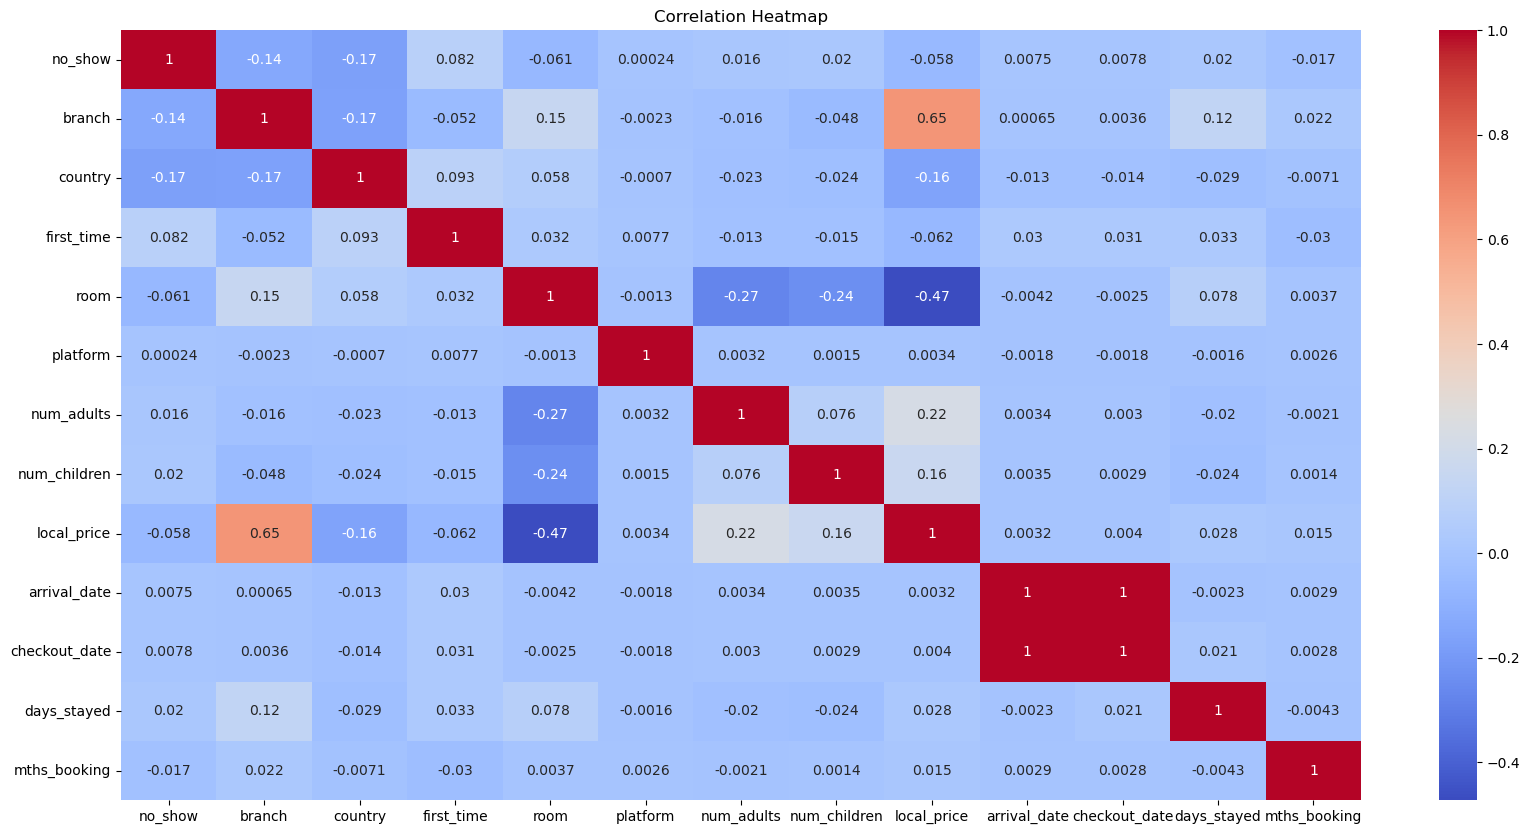

In [193]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df5.corr(), annot=True, cmap="coolwarm");
heatmap.set_title('Correlation Heatmap')
plt.show()

### Lasso Regression (Feature Selection)

In [194]:
degree = 1
lassoAlpha = 1
stepsLassoRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', MinMaxScaler()),
    ('model', Lasso(alpha=lassoAlpha, max_iter=10000, fit_intercept=True))
]

lassoPipe = Pipeline(stepsLassoRegression)

lassoPipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('model', Lasso(alpha=1, max_iter=10000))])

In [195]:
degree = 1
weightsLasso = None
alpha_list = np.arange(0.0001,0.03,0.001)

for alpha in alpha_list:
    degree = 1
    lassoPipe['poly'].alpha = degree
    lassoPipe['model'].alpha = alpha
    lassoPipe['model'].max_iter=10000
    lassoPipe.fit(X_train, y_train)
    coef = lassoPipe['model'].coef_
    coef = np.insert(coef,0,alpha)
    #print(coef)
    if weightsLasso is None: 
        weightsLasso = np.array(coef).reshape(1,-1)
    else:
        weightsLasso = np.vstack((weightsLasso, coef))

In [196]:
feature_names  = list(lassoPipe['poly'].get_feature_names_out())
feature_headings = feature_names.copy()
feature_headings.insert(0,'alpha')
feature_headings

['alpha',
 'branch',
 'country',
 'first_time',
 'room',
 'platform',
 'num_adults',
 'num_children',
 'local_price',
 'arrival_date',
 'checkout_date',
 'days_stayed',
 'mths_booking']

In [197]:
weightsLasso = pd.DataFrame(weightsLasso, columns = feature_headings)
weightsLasso

,alpha,branch,country,first_time,room,platform,num_adults,num_children,local_price,arrival_date,checkout_date,days_stayed,mths_booking
0,0.0001,-0.179001,-0.399647,0.250926,-0.024780,-0.000611,0.001009,0.00161,0.0546,0.00122,0.001362,0.385428,-0.016646
1,0.0011,-0.158149,-0.380763,0.219329,-0.030139,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.008285
2,0.0021,-0.153449,-0.360737,0.184955,-0.023911,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.000000
3,0.0031,-0.148631,-0.340725,0.150130,-0.017670,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.000000
4,0.0041,-0.143813,-0.320712,0.115304,-0.011429,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.000000
5,0.0051,-0.138995,-0.300700,0.080478,-0.005188,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.000000
6,0.0061,-0.134044,-0.280557,0.045725,-0.000000,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.000000
7,0.0071,-0.128433,-0.259776,0.011328,-0.000000,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.000000
8,0.0081,-0.122503,-0.240426,0.000000,-0.000000,-0.000000,0.000000,0.00000,0.0000,0.00000,0.000000,0.000000,-0.000000
9,0.0091,-0.116416,-0.221780,0.000000,-0.000000,-0.000000,0.000000,0.00000,-0.0000,0.00000,0.000000,0.000000,-0.000000


In [198]:
feature_names 

['branch',
 'country',
 'first_time',
 'room',
 'platform',
 'num_adults',
 'num_children',
 'local_price',
 'arrival_date',
 'checkout_date',
 'days_stayed',
 'mths_booking']

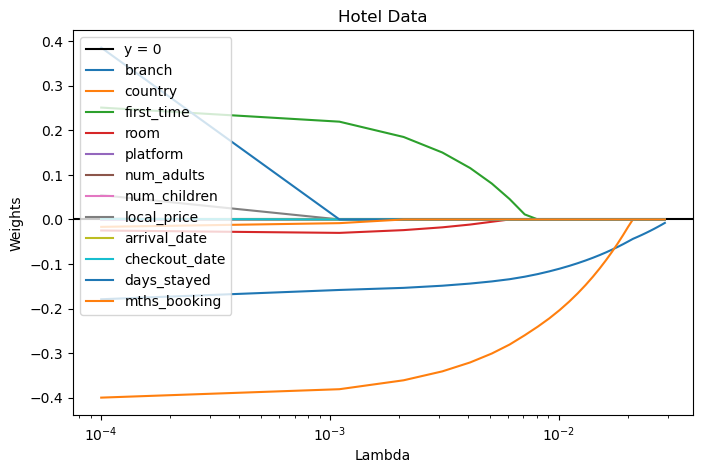

In [199]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.axhline(y=0, c='black', label=str('y = 0'))
for f in feature_names:
    ax1.plot(weightsLasso['alpha'], weightsLasso[f], label=str(f))
ax1.set_title('Hotel Data')
ax1.set_xscale("log")
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Weights')
ax1.legend(loc="upper left")
plt.show()


In [200]:
weightsLasso.iloc[5]

alpha            0.005100
branch          -0.138995
country         -0.300700
first_time       0.080478
room            -0.005188
platform        -0.000000
num_adults       0.000000
num_children     0.000000
local_price      0.000000
arrival_date     0.000000
checkout_date    0.000000
days_stayed      0.000000
mths_booking    -0.000000
Name: 5, dtype: float64

## Conclusion

**Base on the heat map we can conclude that first time visitor has positive impact on the target whereas country and branch has reverse negative impact.** 